In [293]:
import pandas as pd

In [294]:
df = pd.read_csv('event_log.csv')

In [295]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-09-24 11:57:06 UTC,view,1996170,2144415922528452715,electronics.telephone,NaN,31.90,1515915625519388267,LJuJVLEjPT
1,2020-09-24 11:57:26 UTC,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY
2,2020-09-24 11:57:27 UTC,view,215454,2144415927158964449,NaN,NaN,9.81,1515915625513238515,4TMArHtXQy
3,2020-09-24 11:57:33 UTC,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1515915625519014356,aGFYrNgC08
4,2020-09-24 11:57:36 UTC,view,3658723,2144415921169498184,NaN,cameronsino,15.87,1515915625510743344,aa4mmk0kwQ


In [296]:
df.shape

(885129, 9)

df.info()

In [297]:
df[['price']].describe()

,price
count,885129.000000
mean,146.328713
std,296.807683
min,0.220000
25%,26.460000
50%,65.710000
75%,190.490000
max,64771.060000


In [298]:
df.min()

event_time     2020-09-24 11:57:06 UTC
event_type                        cart
product_id                         102
category_id        2144415921001726020
price                             0.22
user_id            1515915625353226922
dtype: object

In [299]:
df.max()

event_time     2021-02-28 23:59:09 UTC
event_type                        view
product_id                     4183880
category_id        2227847332769039290
price                          64771.1
user_id            1515915625611024030
dtype: object

# 1. Active Users

Active User의 기준: 아래 중 1가지의 행동을 한 유저(user_id)

* view(상품 보기)
* cart(장바구니 담기)
* remove_from_cart(장바구니에서 제거하기)
* purchase(구매하기)

## Daily Active User(기간: Daily)

In [300]:
df.event_time

0         2020-09-24 11:57:06 UTC
1         2020-09-24 11:57:26 UTC
2         2020-09-24 11:57:27 UTC
3         2020-09-24 11:57:33 UTC
4         2020-09-24 11:57:36 UTC
                   ...           
885124    2021-02-28 23:55:01 UTC
885125    2021-02-28 23:58:05 UTC
885126    2021-02-28 23:58:09 UTC
885127    2021-02-28 23:58:14 UTC
885128    2021-02-28 23:59:09 UTC
Name: event_time, Length: 885129, dtype: object

In [301]:
df['event_date'] = df['event_time'].str.slice(start=0, stop=10)

In [302]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date
0,2020-09-24 11:57:06 UTC,view,1996170,2144415922528452715,electronics.telephone,NaN,31.90,1515915625519388267,LJuJVLEjPT,2020-09-24
1,2020-09-24 11:57:26 UTC,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY,2020-09-24
2,2020-09-24 11:57:27 UTC,view,215454,2144415927158964449,NaN,NaN,9.81,1515915625513238515,4TMArHtXQy,2020-09-24
3,2020-09-24 11:57:33 UTC,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1515915625519014356,aGFYrNgC08,2020-09-24
4,2020-09-24 11:57:36 UTC,view,3658723,2144415921169498184,NaN,cameronsino,15.87,1515915625510743344,aa4mmk0kwQ,2020-09-24


In [303]:
df['event_date_dtm_format'] = pd.to_datetime(df['event_date'], format='%Y-%m-%d')

In [304]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date,event_date_dtm_format
0,2020-09-24 11:57:06 UTC,view,1996170,2144415922528452715,electronics.telephone,NaN,31.90,1515915625519388267,LJuJVLEjPT,2020-09-24,2020-09-24
1,2020-09-24 11:57:26 UTC,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY,2020-09-24,2020-09-24
2,2020-09-24 11:57:27 UTC,view,215454,2144415927158964449,NaN,NaN,9.81,1515915625513238515,4TMArHtXQy,2020-09-24,2020-09-24
3,2020-09-24 11:57:33 UTC,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1515915625519014356,aGFYrNgC08,2020-09-24,2020-09-24
4,2020-09-24 11:57:36 UTC,view,3658723,2144415921169498184,NaN,cameronsino,15.87,1515915625510743344,aa4mmk0kwQ,2020-09-24,2020-09-24


In [305]:
df = df.loc[df['event_date'] > '2020-09-30']

In [306]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date,event_date_dtm_format
28074,2020-10-01 00:01:36 UTC,view,1795171,2144415922360680550,computers.peripherals.camera,canyon,39.75,1515915625520113390,4X2NwIInsI,2020-10-01,2020-10-01
28075,2020-10-01 00:04:11 UTC,view,1549819,2144415925011480748,stationery.cartrige,xerox,69.35,1515915625521278799,daM8ubpOfo,2020-10-01,2020-10-01
28076,2020-10-01 00:07:23 UTC,view,4156248,2144415921169498184,NaN,NaN,17.14,1515915625521278938,EdgYsorbdC,2020-10-01,2020-10-01
28077,2020-10-01 00:07:56 UTC,view,16101,2144415922360680550,computers.peripherals.camera,NaN,30.38,1515915625520113390,4X2NwIInsI,2020-10-01,2020-10-01
28078,2020-10-01 00:08:11 UTC,view,880508,2144415926806642904,computers.components.power_supply,cougar,57.13,1515915625521279091,Et4GWStGMB,2020-10-01,2020-10-01


In [307]:
# 날짜 별 unique user 수 계산하기

df_2 = df.groupby('event_date')['user_id'].nunique()

In [308]:
df_2.head()

event_date
2020-10-01    2699
2020-10-02    2559
2020-10-03    2162
2020-10-04    2398
2020-10-05    2832
Name: user_id, dtype: int64

In [309]:
df_2.index

Index(['2020-10-01', '2020-10-02', '2020-10-03', '2020-10-04', '2020-10-05',
       '2020-10-06', '2020-10-07', '2020-10-08', '2020-10-09', '2020-10-10',
       ...
       '2021-02-19', '2021-02-20', '2021-02-21', '2021-02-22', '2021-02-23',
       '2021-02-24', '2021-02-25', '2021-02-26', '2021-02-27', '2021-02-28'],
      dtype='object', name='event_date', length=151)

In [310]:
dau_data = pd.DataFrame({'event_date':df_2.index, 'user_count':df_2.values})

In [311]:
dau_data.head()

,event_date,user_count
0,2020-10-01,2699
1,2020-10-02,2559
2,2020-10-03,2162
3,2020-10-04,2398
4,2020-10-05,2832


In [312]:
dau_data.describe()

,user_count
count,151.000000
mean,2984.854305
std,472.763921
min,1370.000000
25%,2683.500000
50%,2943.000000
75%,3308.500000
max,4287.000000


In [313]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

Text(0, 0.5, '유저수')

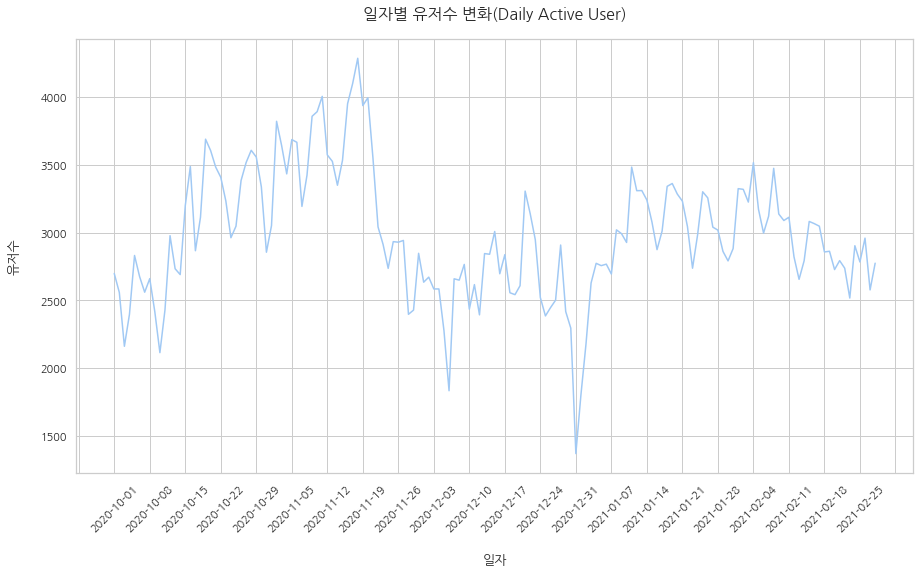

In [314]:
sns.set_theme(style='whitegrid', palette='pastel')
plt.rc('font', family='NanumGothic')
plt.xticks(rotation=45)

g = sns.lineplot(x='event_date', y='user_count', data=dau_data)
g.figure.set_size_inches(15, 8)
g.xaxis.set_major_locator(ticker.MultipleLocator(7))
g.set_title('일자별 유저수 변화(Daily Active User)', pad=20, size=16)
g.set_xlabel('일자', labelpad=20, size=13)
g.set_ylabel('유저수', labelpad=20, size=13)

## Weekly Active User(기간: Weekly)

In [315]:
df['year_week_number'] = df.event_date_dtm_format.dt.strftime('%Y-w%U')

In [316]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date,event_date_dtm_format,year_week_number
28074,2020-10-01 00:01:36 UTC,view,1795171,2144415922360680550,computers.peripherals.camera,canyon,39.75,1515915625520113390,4X2NwIInsI,2020-10-01,2020-10-01,2020-w39
28075,2020-10-01 00:04:11 UTC,view,1549819,2144415925011480748,stationery.cartrige,xerox,69.35,1515915625521278799,daM8ubpOfo,2020-10-01,2020-10-01,2020-w39
28076,2020-10-01 00:07:23 UTC,view,4156248,2144415921169498184,NaN,NaN,17.14,1515915625521278938,EdgYsorbdC,2020-10-01,2020-10-01,2020-w39
28077,2020-10-01 00:07:56 UTC,view,16101,2144415922360680550,computers.peripherals.camera,NaN,30.38,1515915625520113390,4X2NwIInsI,2020-10-01,2020-10-01,2020-w39
28078,2020-10-01 00:08:11 UTC,view,880508,2144415926806642904,computers.components.power_supply,cougar,57.13,1515915625521279091,Et4GWStGMB,2020-10-01,2020-10-01,2020-w39


In [317]:
df_3 = df.groupby('year_week_number')['user_id'].nunique()

In [318]:
df_3.head()

year_week_number
2020-w39     7141
2020-w40    16633
2020-w41    19305
2020-w42    22179
2020-w43    21956
Name: user_id, dtype: int64

In [319]:
wau_data = pd.DataFrame({'year_week_number':df_3.index, 'user_count':df_3.values})

In [320]:
wau_data.head()

,year_week_number,user_count
0,2020-w39,7141
1,2020-w40,16633
2,2020-w41,19305
3,2020-w42,22179
4,2020-w43,21956


In [321]:
wau_data.describe()

,user_count
count,24.000000
mean,17555.083333
std,5837.987920
min,2775.000000
25%,16738.000000
50%,18778.500000
75%,20581.750000
max,25600.000000


Text(0, 0.5, '유저수')

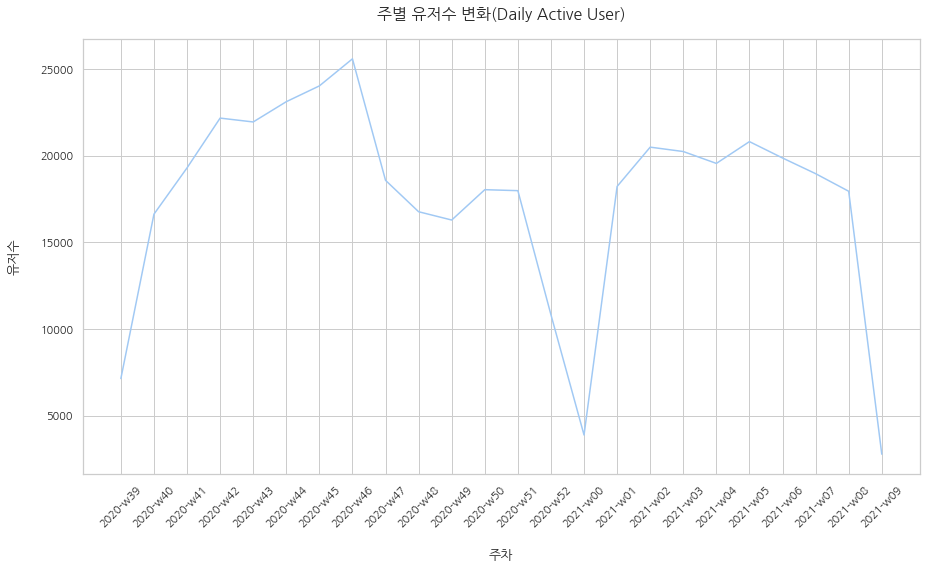

In [322]:
sns.set_theme(style='whitegrid', palette='pastel')
plt.rc('font', family='NanumGothic')
plt.xticks(rotation=45)

g = sns.lineplot(x='year_week_number', y='user_count', data=wau_data)
g.figure.set_size_inches(15, 8)
g.set_title('주별 유저수 변화(Daily Active User)', pad=20, size=16)
g.set_xlabel('주차', labelpad=20, size=13)
g.set_ylabel('유저수', labelpad=20, size=13)

In [323]:
df.groupby('year_week_number')['event_date'].nunique()

year_week_number
2020-w39    3
2020-w40    7
2020-w41    7
2020-w42    7
2020-w43    7
2020-w44    7
2020-w45    7
2020-w46    7
2020-w47    7
2020-w48    7
2020-w49    7
2020-w50    7
2020-w51    7
2020-w52    5
2021-w00    2
2021-w01    7
2021-w02    7
2021-w03    7
2021-w04    7
2021-w05    7
2021-w06    7
2021-w07    7
2021-w08    7
2021-w09    1
Name: event_date, dtype: int64

In [324]:
df.loc[df.year_week_number == '2020-w52', ['year_week_number']] = '2021-w00'

In [325]:
df_3 = df.groupby('year_week_number')['event_date'].nunique()

In [326]:
df_3

year_week_number
2020-w39    3
2020-w40    7
2020-w41    7
2020-w42    7
2020-w43    7
2020-w44    7
2020-w45    7
2020-w46    7
2020-w47    7
2020-w48    7
2020-w49    7
2020-w50    7
2020-w51    7
2021-w00    7
2021-w01    7
2021-w02    7
2021-w03    7
2021-w04    7
2021-w05    7
2021-w06    7
2021-w07    7
2021-w08    7
2021-w09    1
Name: event_date, dtype: int64

In [327]:
df_without_week_number_count_unser_7 = df.loc[df['year_week_number'] != '2020-w39']

In [328]:
df_without_week_number_count_unser_7 = df_without_week_number_count_unser_7.loc[df_without_week_number_count_unser_7['year_week_number'] != '2021-w09']

In [329]:
df_without_week_number_count_unser_7

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date,event_date_dtm_format,year_week_number
41060,2020-10-04 00:00:45 UTC,view,1027301,2144415926445932750,electronics.audio.acoustic,acv,70.41,1515915625522165241,vkPZ8hp09D,2020-10-04,2020-10-04,2020-w40
41061,2020-10-04 00:01:17 UTC,view,218568,2144415928148820220,NaN,buro,0.37,1515915625522164973,KKFPnQqjwR,2020-10-04,2020-10-04,2020-w40
41062,2020-10-04 00:01:28 UTC,view,322460,2144415933660135822,NaN,NaN,182.54,1515915625504813192,pKFjO8s46S,2020-10-04,2020-10-04,2020-w40
41063,2020-10-04 00:01:36 UTC,view,3791351,2144415926966026460,computers.components.cpu,amd,204.29,1515915625522138986,UymjesoOzQ,2020-10-04,2020-10-04,2020-w40
41064,2020-10-04 00:01:57 UTC,view,3791351,2144415926966026460,computers.components.cpu,amd,204.29,1515915625522138986,UymjesoOzQ,2020-10-04,2020-10-04,2020-w40
...,...,...,...,...,...,...,...,...,...,...,...,...
879856,2021-02-27 23:54:18 UTC,view,3605626,2144415927284793573,computers.components.tv_tuner,NaN,135.60,1515915625610575761,4cdLnsrdN7,2021-02-27,2021-02-27,2021-w08
879857,2021-02-27 23:54:40 UTC,purchase,1282166,2144415973346640379,computers.components.hdd,samsung,60.54,1515915625596223978,23rgL9Smqy,2021-02-27,2021-02-27,2021-w08
879858,2021-02-27 23:55:01 UTC,view,3791403,2144415926966026460,computers.components.cpu,amd,236.97,1515915625610075250,jIBEdIH8sd,2021-02-27,2021-02-27,2021-w08
879859,2021-02-27 23:55:05 UTC,view,3632668,2144415922528452715,electronics.telephone,NaN,34.44,1515915625610460876,ZU12Xy1KMK,2021-02-27,2021-02-27,2021-w08


In [330]:
df_group_by_week_number = df_without_week_number_count_unser_7.groupby('year_week_number')['user_id'].nunique()

In [331]:
wau_data = pd.DataFrame({'year_week_number':df_group_by_week_number.index, 'user_count':df_group_by_week_number.values})

In [332]:
wau_data.describe()

,user_count
count,21.000000
mean,19580.047619
std,2721.335122
min,14484.000000
25%,17990.000000
50%,19305.000000
75%,20821.000000
max,25600.000000


(0.0, 28000.0)

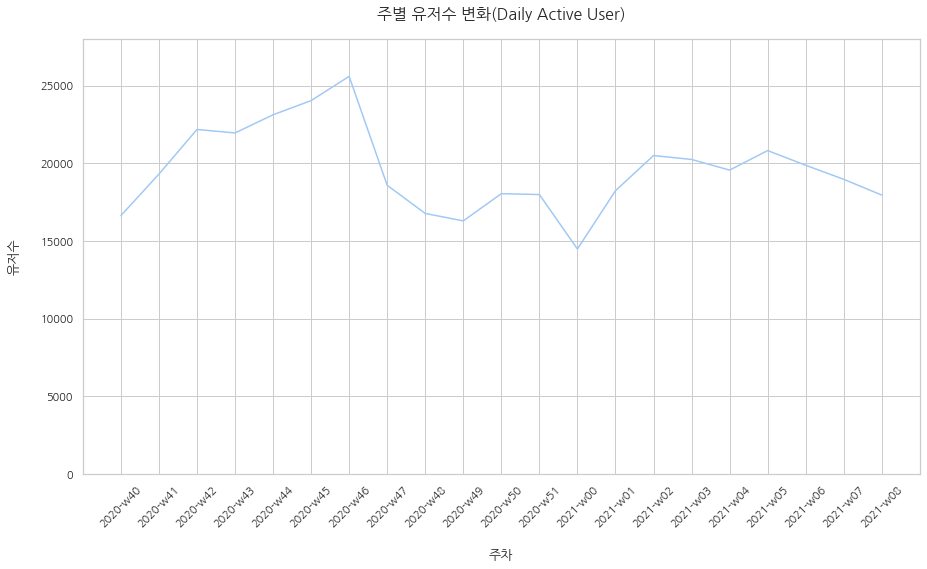

In [333]:
sns.set_theme(style='whitegrid', palette='pastel')
plt.rc('font', family='NanumGothic')
plt.xticks(rotation=45)

g = sns.lineplot(x='year_week_number', y='user_count', data=wau_data)
g.figure.set_size_inches(15, 8)
g.set_title('주별 유저수 변화(Daily Active User)', pad=20, size=16)
g.set_xlabel('주차', labelpad=20, size=13)
g.set_ylabel('유저수', labelpad=20, size=13)
g.set_ylim(0, 28000)

## Monthly Active User

In [334]:
df['year_month'] = df.event_date_dtm_format.dt.strftime('%Y-%m')

In [335]:
df.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,event_date,event_date_dtm_format,year_week_number,year_month
28074,2020-10-01 00:01:36 UTC,view,1795171,2144415922360680550,computers.peripherals.camera,canyon,39.75,1515915625520113390,4X2NwIInsI,2020-10-01,2020-10-01,2020-w39,2020-10
28075,2020-10-01 00:04:11 UTC,view,1549819,2144415925011480748,stationery.cartrige,xerox,69.35,1515915625521278799,daM8ubpOfo,2020-10-01,2020-10-01,2020-w39,2020-10
28076,2020-10-01 00:07:23 UTC,view,4156248,2144415921169498184,NaN,NaN,17.14,1515915625521278938,EdgYsorbdC,2020-10-01,2020-10-01,2020-w39,2020-10
28077,2020-10-01 00:07:56 UTC,view,16101,2144415922360680550,computers.peripherals.camera,NaN,30.38,1515915625520113390,4X2NwIInsI,2020-10-01,2020-10-01,2020-w39,2020-10
28078,2020-10-01 00:08:11 UTC,view,880508,2144415926806642904,computers.components.power_supply,cougar,57.13,1515915625521279091,Et4GWStGMB,2020-10-01,2020-10-01,2020-w39,2020-10


In [336]:
df_4 = df.groupby('year_month')['user_id'].nunique()

In [337]:
df_4

year_month
2020-10    84216
2020-11    92600
2020-12    72137
2021-01    81256
2021-02    74606
Name: user_id, dtype: int64

In [338]:
mau_data = pd.DataFrame({'year_month': df_4.index, 'user_count': df_4.values})

In [339]:
mau_data

,year_month,user_count
0,2020-10,84216
1,2020-11,92600
2,2020-12,72137
3,2021-01,81256
4,2021-02,74606


In [340]:
mau_data.describe()

,user_count
count,5.000000
mean,80963.000000
std,8130.149937
min,72137.000000
25%,74606.000000
50%,81256.000000
75%,84216.000000
max,92600.000000


Text(0, 0.5, '유저수')

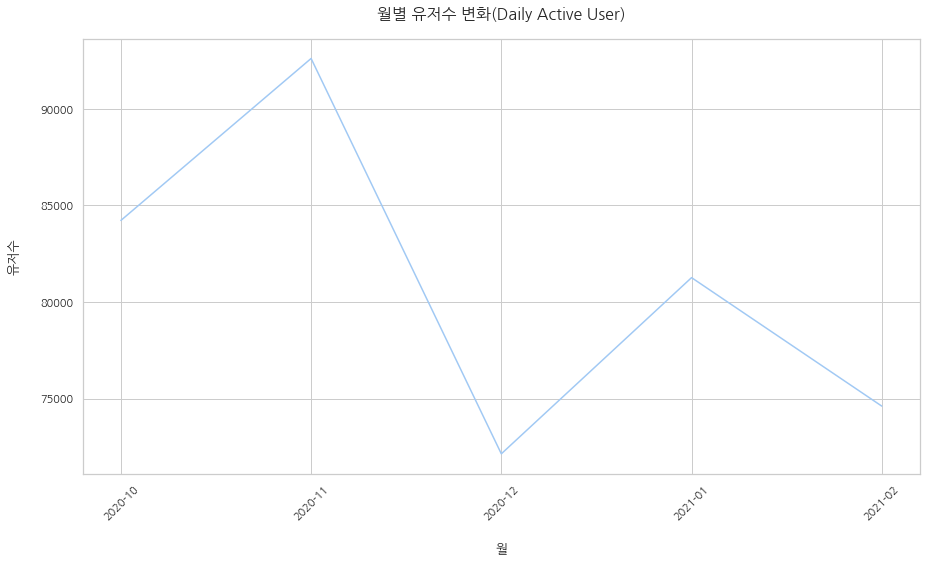

In [341]:
sns.set_theme(style='whitegrid', palette='pastel')
plt.rc('font', family='NanumGothic')
plt.xticks(rotation=45)

g = sns.lineplot(x='year_month', y='user_count', data=mau_data)
g.figure.set_size_inches(15, 8)
g.set_title('월별 유저수 변화(Daily Active User)', pad=20, size=16)
g.set_xlabel('월', labelpad=20, size=13)
g.set_ylabel('유저수', labelpad=20, size=13)

## DAU / MAU

In [342]:
dau_data.user_count.mean()

2984.8543046357618

In [343]:
mau_data.user_count.mean()

80963.0

In [345]:
avg_daily_user = dau_data.user_count.mean()
avg_monthly_user = mau_data.user_count.mean()

dau_mau_ratio = avg_daily_user / avg_monthly_user
print(dau_mau_ratio * 100, '%')

3.686689357651966 %


거의 매일 새로운 유저가 유입되는 서비스이다